### BIKE Sharing(Boom Bikes) - Linear Regression Assignment

## Problem Statement
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled herein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Business Objectives:
 - They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
    


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Import Statistical Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

### Step 1. Read the Data

In [4]:
# read csv file
bike = pd.read_csv("day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
# Display the first five rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Describe the statistical information of the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Display the nulls and the datatypes 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Display the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Display the shape( no of rows and columns of the Dataframe)
bike.shape

(730, 16)

### Step 2: Cleaning The Data

In [10]:
# Display the Columns of teh Dataframe
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Remove unwanted columns
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bike_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [12]:
# Make columns readable
bike_new.rename(columns={'season':'Season', 'yr':'Year', 'mnth':'Month', 'holiday':'Holiday', 'weekday':'Week_day', 'workingday':'Working_day', 'weathersit':'Weather_Situation', 'temp':'Temp', 'atemp':'Feel_temp', 'hum':'Humidity', 'windspeed':'Windspeed', 'cnt':'Count'}, inplace = True)
bike_new.head()

,Season,Year,Month,Holiday,Week_day,Working_day,Weather_Situation,Temp,Feel_temp,Humidity,Windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Convert the data types to category
bike_new['Season']=bike_new['Season'].astype('category')
bike_new['Year']=bike_new['Year'].astype('category')
bike_new['Weather_Situation']=bike_new['Weather_Situation'].astype('category')
bike_new['Month']=bike_new['Month'].astype('category')
bike_new['Week_day']=bike_new['Week_day'].astype('category')
bike_new['Holiday'] = bike_new['Holiday'].astype('category')
bike_new['Working_day'] = bike_new['Working_day'].astype('category')
bike_new['Weather_Situation'] = bike_new['Weather_Situation'].astype('category')

In [14]:
# Display the Datatypes 
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Season             730 non-null    category
 1   Year               730 non-null    category
 2   Month              730 non-null    category
 3   Holiday            730 non-null    category
 4   Week_day           730 non-null    category
 5   Working_day        730 non-null    category
 6   Weather_Situation  730 non-null    category
 7   Temp               730 non-null    float64 
 8   Feel_temp          730 non-null    float64 
 9   Humidity           730 non-null    float64 
 10  Windspeed          730 non-null    float64 
 11  Count              730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [15]:
# Display the Statistical information of the dataframe
bike_new.describe()

,Temp,Feel_temp,Humidity,Windspeed,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [16]:
# Replace the value of Season column with the names in the data dictionary
bike_new.Season = bike_new.Season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_new.head()

,Season,Year,Month,Holiday,Week_day,Working_day,Weather_Situation,Temp,Feel_temp,Humidity,Windspeed,Count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Replace the value of Year column with the names in the data dictionary
bike_new.Year = bike_new.Year.replace({0: 2018, 1:2019})
bike_new.Year

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: Year, Length: 730, dtype: category
Categories (2, int64): [2018, 2019]

In [18]:
bike_new.Season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: Season, dtype: int64

In [19]:
# Replace the value of Week_day column with the names in the data dictionary
bike_new.Week_day = bike_new.Week_day.replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday' })
bike_new.Week_day 

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
725       Friday
726     Saturday
727       Sunday
728       Monday
729      Tuesday
Name: Week_day, Length: 730, dtype: category
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [20]:
bike_new.Week_day.value_counts()

Monday       105
Tuesday      105
Sunday       104
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Name: Week_day, dtype: int64

In [21]:
# Replace the value of Weather_Situation column with the names in the data dictionary
bike_new.Weather_Situation = bike_new.Weather_Situation.replace({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'})
bike_new.Weather_Situation

0      Mist + Cloudy
1      Mist + Cloudy
2              Clear
3              Clear
4              Clear
           ...      
725    Mist + Cloudy
726    Mist + Cloudy
727    Mist + Cloudy
728            Clear
729    Mist + Cloudy
Name: Weather_Situation, Length: 730, dtype: category
Categories (3, object): ['Clear', 'Mist + Cloudy', 'Light Snow']

In [22]:
bike_new.Weather_Situation.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: Weather_Situation, dtype: int64

In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Season             730 non-null    category
 1   Year               730 non-null    category
 2   Month              730 non-null    category
 3   Holiday            730 non-null    category
 4   Week_day           730 non-null    category
 5   Working_day        730 non-null    category
 6   Weather_Situation  730 non-null    category
 7   Temp               730 non-null    float64 
 8   Feel_temp          730 non-null    float64 
 9   Humidity           730 non-null    float64 
 10  Windspeed          730 non-null    float64 
 11  Count              730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [24]:
# Replace the value of Month column with the names in the data dictionary
bike_new.Month = bike_new.Month.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_new.Month

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: Month, Length: 730, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sept', 'Oct', 'Nov', 'Dec']

In [25]:
bike_new.Month.value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: Month, dtype: int64

In [26]:
# Replace the value of Month column with the names in the data dictionary
bike_new.Working_day= bike_new.Working_day.replace({0:'Holiday', 1:'Working'})

In [27]:
bike_new.Working_day.value_counts()

Working    504
Holiday    226
Name: Working_day, dtype: int64

In [28]:
# Drop column 'Holiday' as the working day Column includes sunday

bike_new.drop(['Holiday'], axis = 1, inplace = True)

In [29]:
bike_new.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Feel_temp,Humidity,Windspeed,Count
0,spring,2018,Jan,Monday,Working,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Tuesday,Working,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Wednesday,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Thursday,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Friday,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

**understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

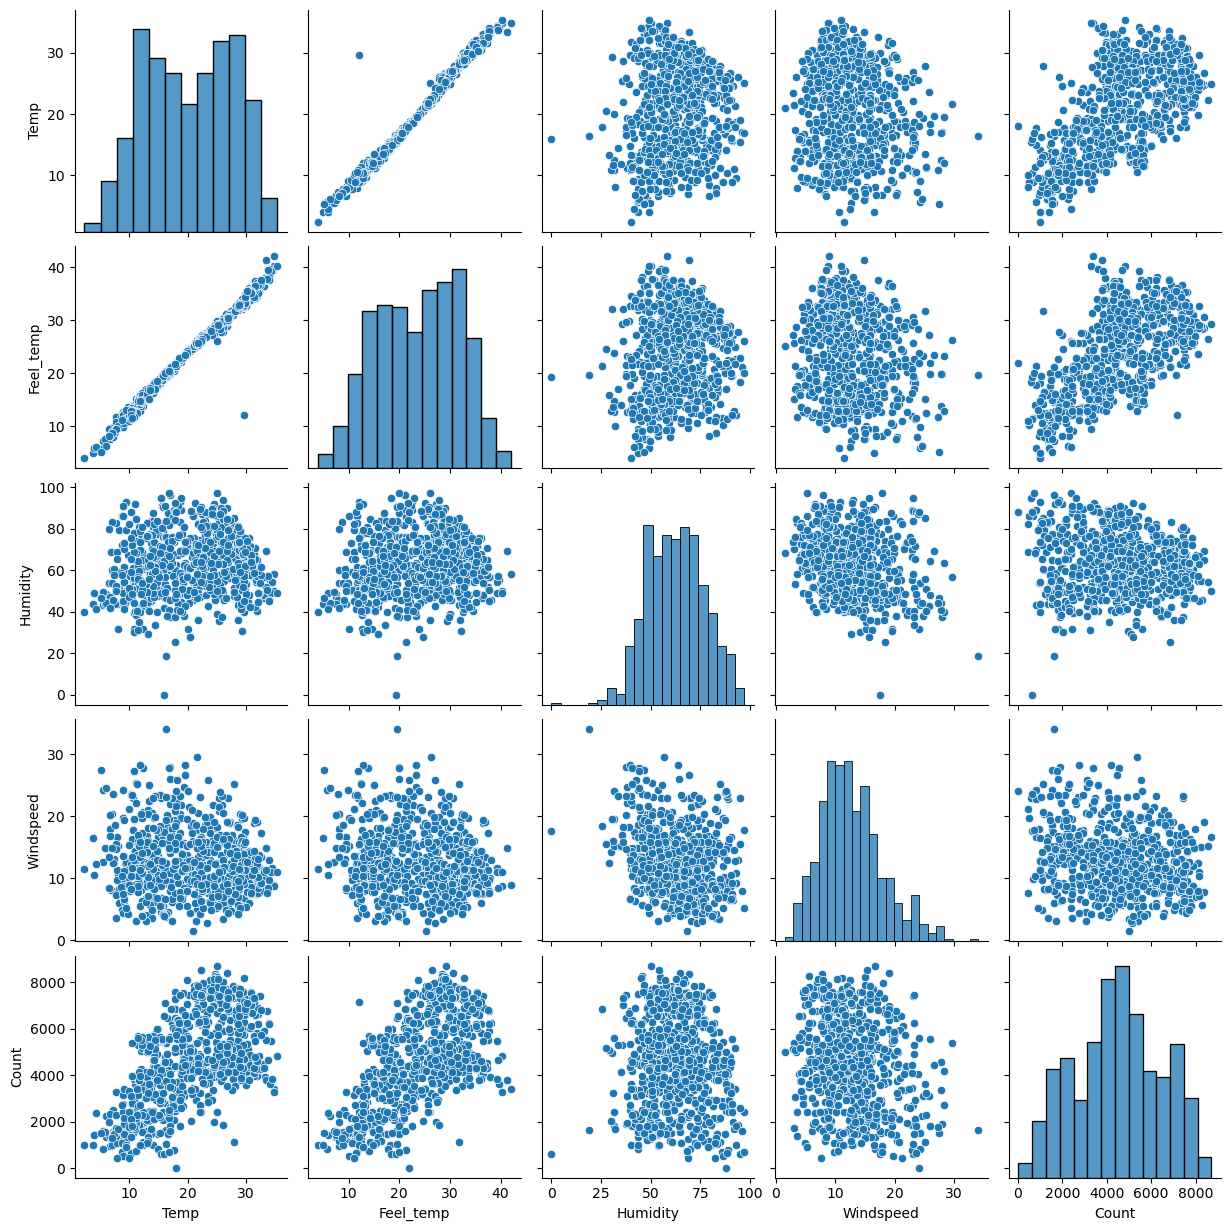

In [30]:
#Visualize the data by pairplot
sns.pairplot(bike_new)
plt.show()

##### Observation:- We  can see that the Temp and Feel_temp column are highly correlated and hence Feel_temp column should be dropped.

In [31]:
# Drop 'Feel_temp' as the Temp column plots have same visualization so we will drop Feel_Temp

bike_new.drop(['Feel_temp'], axis = 1, inplace = True)

In [32]:
bike_new.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Humidity,Windspeed,Count
0,spring,2018,Jan,Monday,Working,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Tuesday,Working,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Wednesday,Working,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Thursday,Working,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Friday,Working,Clear,9.305237,43.6957,12.522300,1600


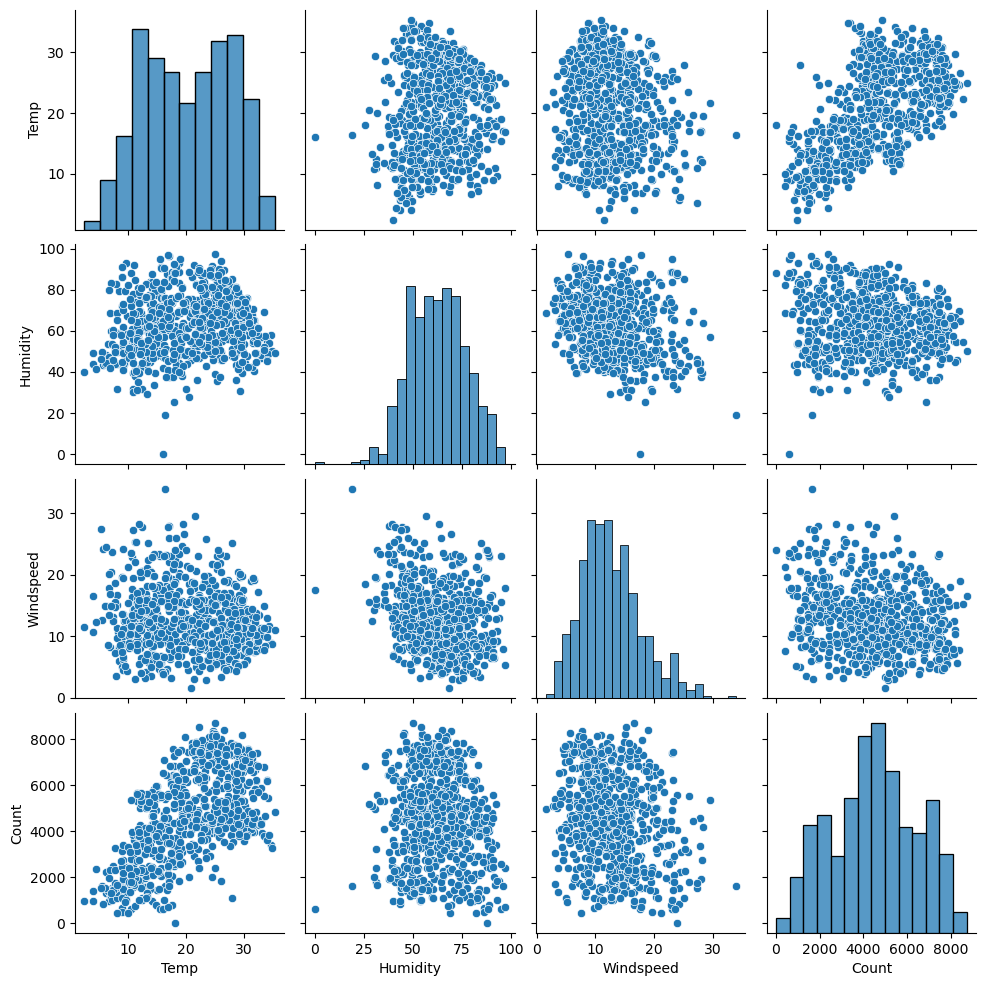

In [33]:
#Visualize the data by pairplot after droping Feel_temp column
sns.pairplot(bike_new)
plt.show()

#### Observation:- 
- Now we can consider remaining numerical columns for Model Building or linear Regression as there are some variables that are correlated with the Count.

In [34]:
bike_new.columns

Index(['Season', 'Year', 'Month', 'Week_day', 'Working_day',
       'Weather_Situation', 'Temp', 'Humidity', 'Windspeed', 'Count'],
      dtype='object')

In [35]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Season             730 non-null    category
 1   Year               730 non-null    category
 2   Month              730 non-null    category
 3   Week_day           730 non-null    category
 4   Working_day        730 non-null    category
 5   Weather_Situation  730 non-null    category
 6   Temp               730 non-null    float64 
 7   Humidity           730 non-null    float64 
 8   Windspeed          730 non-null    float64 
 9   Count              730 non-null    int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 28.5 KB


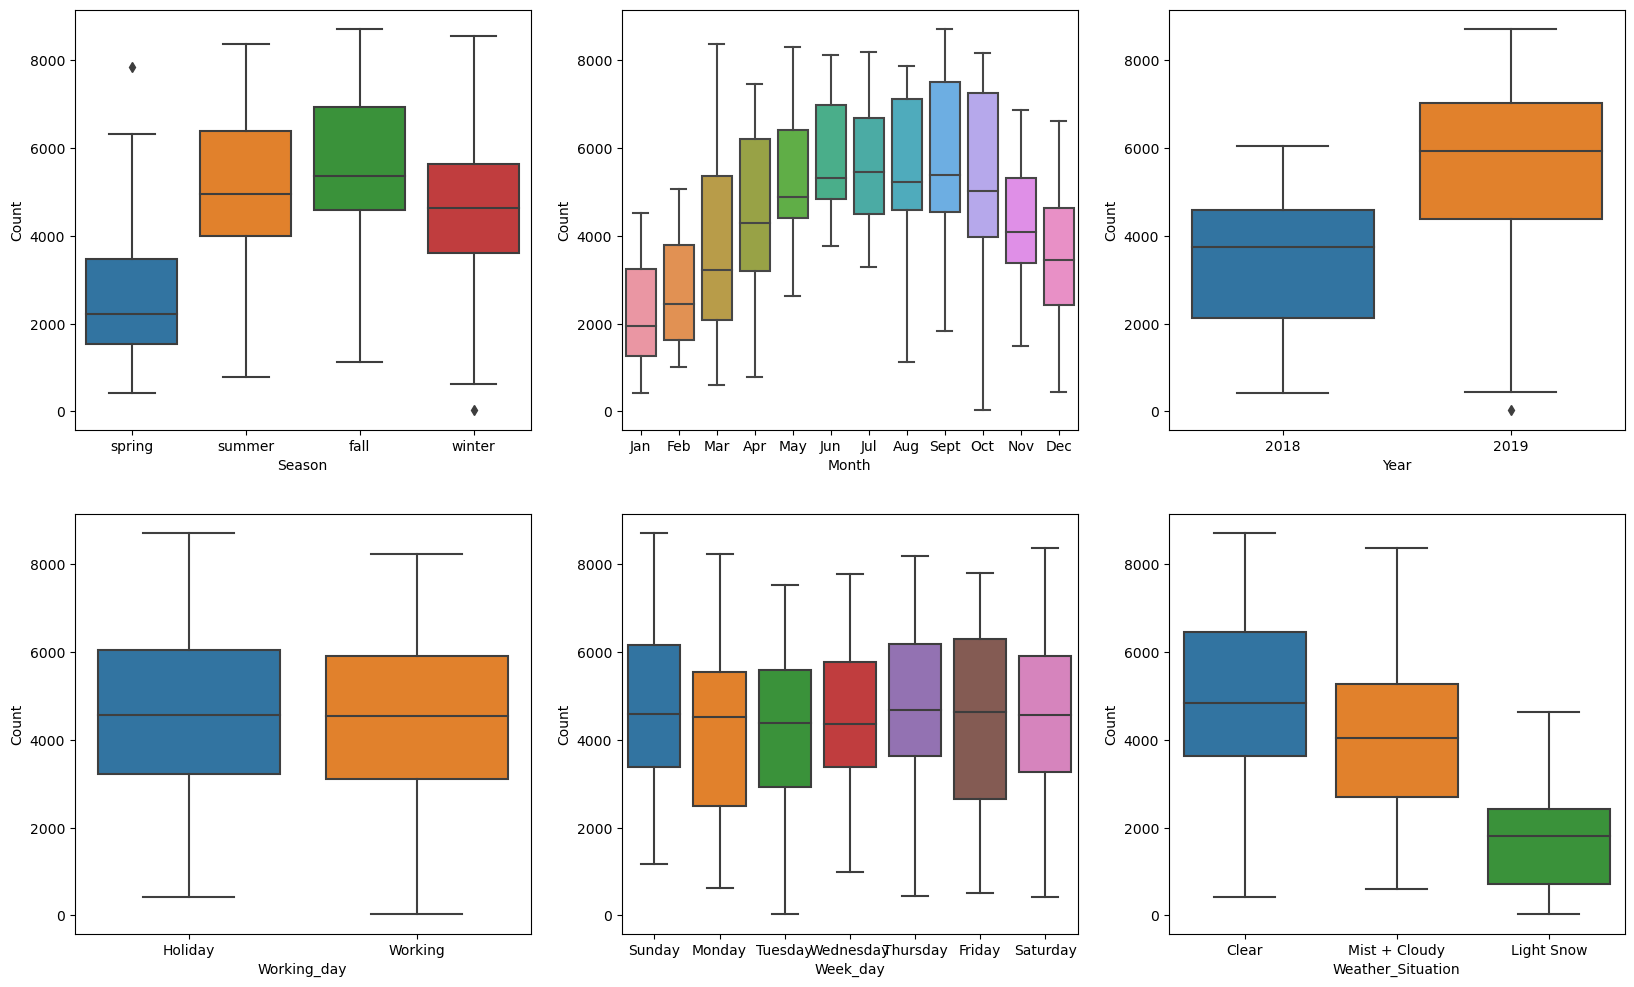

In [36]:
# Visualization of Categorical data by box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'Month', y = 'Count', data = bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'Year', y = 'Count', data = bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'Working_day', y = 'Count', data = bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'Week_day', y = 'Count', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'Weather_Situation', y = 'Count', data = bike_new)

plt.show()


#### Observation:- 
- From ‘Season’ Column’ we can see that –
- The demand for the bikes is highest during the Fall Season. 
- The demand for the bikes is lowest during the Spring Season.
- For the ‘Month’ Column we ca see that the demand for bikes in ‘September’ is the highest followed by ‘October’, ‘August’ and ‘June’.
- The Demand for the bikes was higher during the year 2019 as compared to year 2018.
- There is a very slightly higher demand on holidays as compared to working days. The demand is almost Same.
- During the week_days again its observed that the demand for the bikes is higher on Friday, Thursday and Sunday. 
- The demand for the bikes is higher when the Weather_Situation is Clear, as compared to the days when the Weather_Situation is misty + Cloud or when there is light snow.



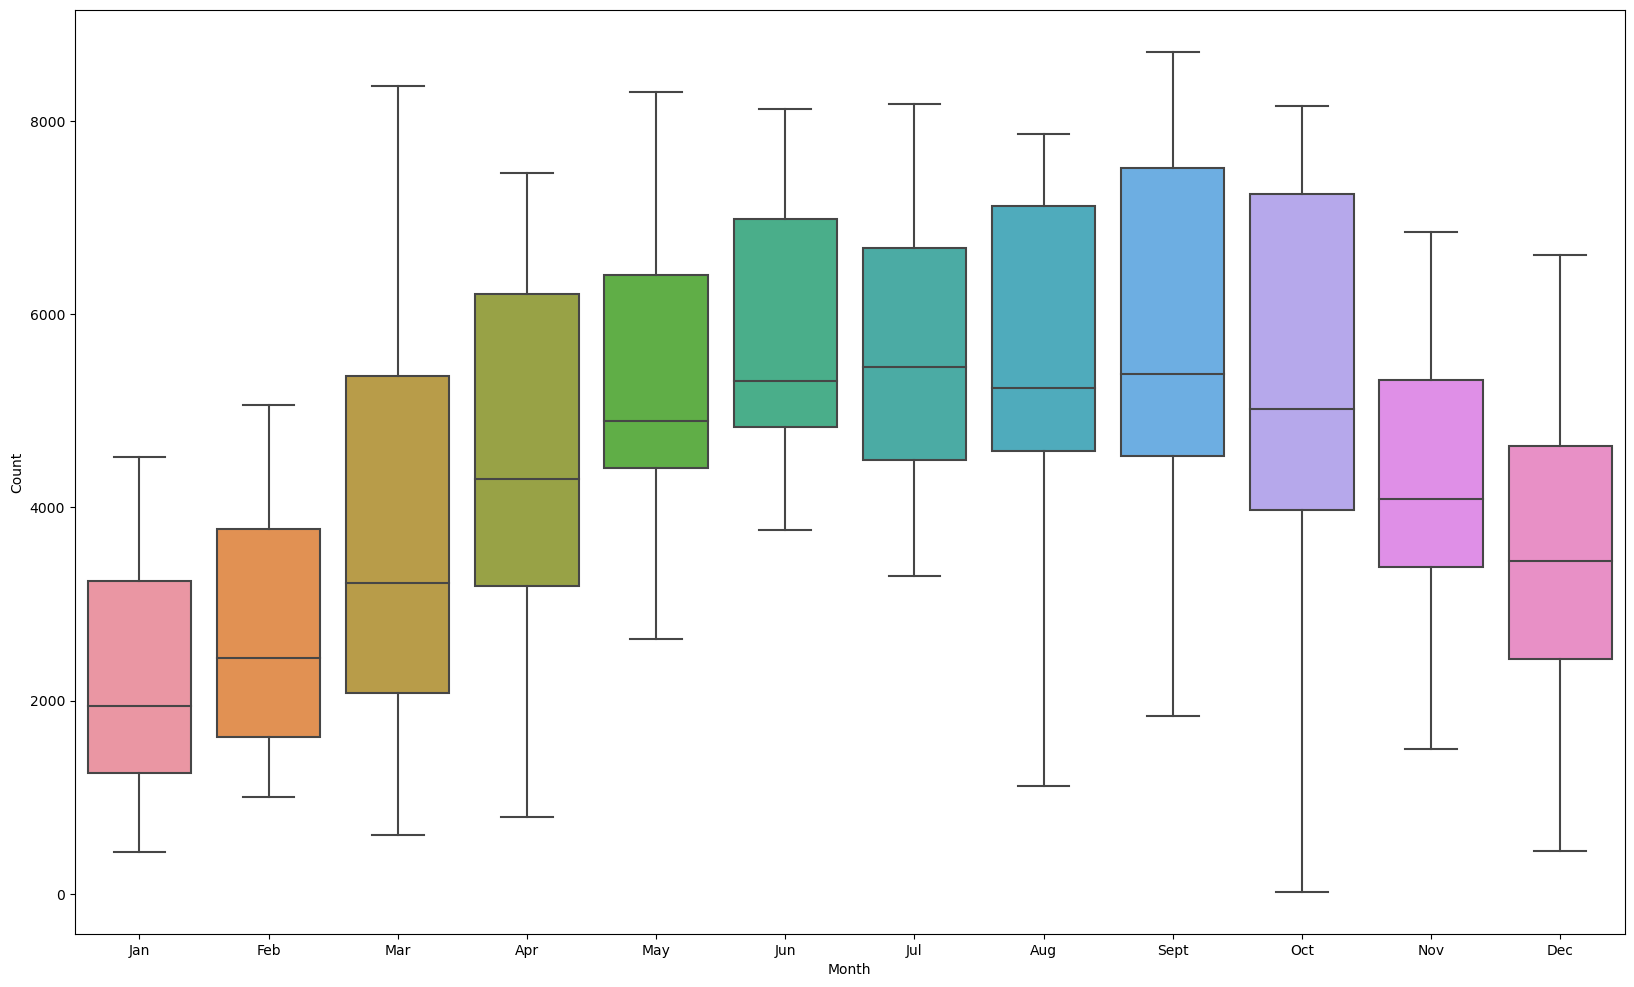

In [37]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Month', y = 'Count', data = bike_new)
plt.show()

## Step 3: Data Preparation

####
 We need to convert the categorical data into integer. 

For this, we will use something called `dummy variables`.

In [38]:
# Get the dummy variables for the Categorical columns and store it in a new variable - 'status'
status = pd.get_dummies(bike_new[['Season', 'Year', 'Month', 'Week_day', 'Working_day', 'Weather_Situation']])

In [39]:
# Check what the dataset 'status' looks like
status.head()

,Season_spring,Season_summer,Season_fall,Season_winter,Year_2018,Year_2019,Month_Jan,Month_Feb,Month_Mar,Month_Apr,...,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Holiday,Working_day_Working,Weather_Situation_Clear,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [40]:
# Let's drop the first column from status bike_new using 'drop_first = True'

status = pd.get_dummies(bike_new[['Season', 'Year', 'Month', 'Week_day', 'Working_day', 'Weather_Situation']], drop_first = True)
status.head()

,Season_summer,Season_fall,Season_winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,Month_May,Month_Jun,Month_Jul,...,Month_Dec,Week_day_Monday,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Working,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [41]:
# Add the results to the original bike_new dataframe

bike_new = pd.concat([bike_new, status], axis=1)

In [42]:
# Now let's see the head of our dataframe.

bike_new.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Humidity,Windspeed,Count,...,Month_Dec,Week_day_Monday,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Working,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
0,spring,2018,Jan,Monday,Working,Mist + Cloudy,14.110847,80.5833,10.749882,985,...,0,1,0,0,0,0,0,1,1,0
1,spring,2018,Jan,Tuesday,Working,Mist + Cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,1,1,0
2,spring,2018,Jan,Wednesday,Working,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,1,0,0,0,1,0,0
3,spring,2018,Jan,Thursday,Working,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,Friday,Working,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,1,0,1,0,0


In [43]:
# Drop the following columns as we have created dummies for it
bike_new.drop(['Season', 'Year', 'Month', 'Week_day', 'Working_day', 'Weather_Situation'], axis = 1, inplace = True)

In [44]:
bike_new.head()

,Temp,Humidity,Windspeed,Count,Season_summer,Season_fall,Season_winter,Year_2019,Month_Feb,Month_Mar,...,Month_Dec,Week_day_Monday,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Working,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [45]:
bike_new.shape

(730, 28)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [46]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


### Rescaling the Features 

We will use MinMax scaling.

In [47]:
# 1.Instantiate an object
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except'dummy' variables
# create list of numeric variables
num_vars = ['Temp', 'Humidity', 'Windspeed', 'Count']

# 2.For the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.head()

,Temp,Humidity,Windspeed,Count,Season_summer,Season_fall,Season_winter,Year_2019,Month_Feb,Month_Mar,...,Month_Dec,Week_day_Monday,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Working,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
df_train.describe()

,Temp,Humidity,Windspeed,Count,Season_summer,Season_fall,Season_winter,Year_2019,Month_Feb,Month_Mar,...,Month_Dec,Week_day_Monday,Week_day_Tuesday,Week_day_Wednesday,Week_day_Thursday,Week_day_Friday,Week_day_Saturday,Working_day_Working,Weather_Situation_Mist + Cloudy,Weather_Situation_Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.507843,0.066667,0.098039,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.711765,0.343137,0.029412
std,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.500429,0.249689,0.297660,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.453386,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


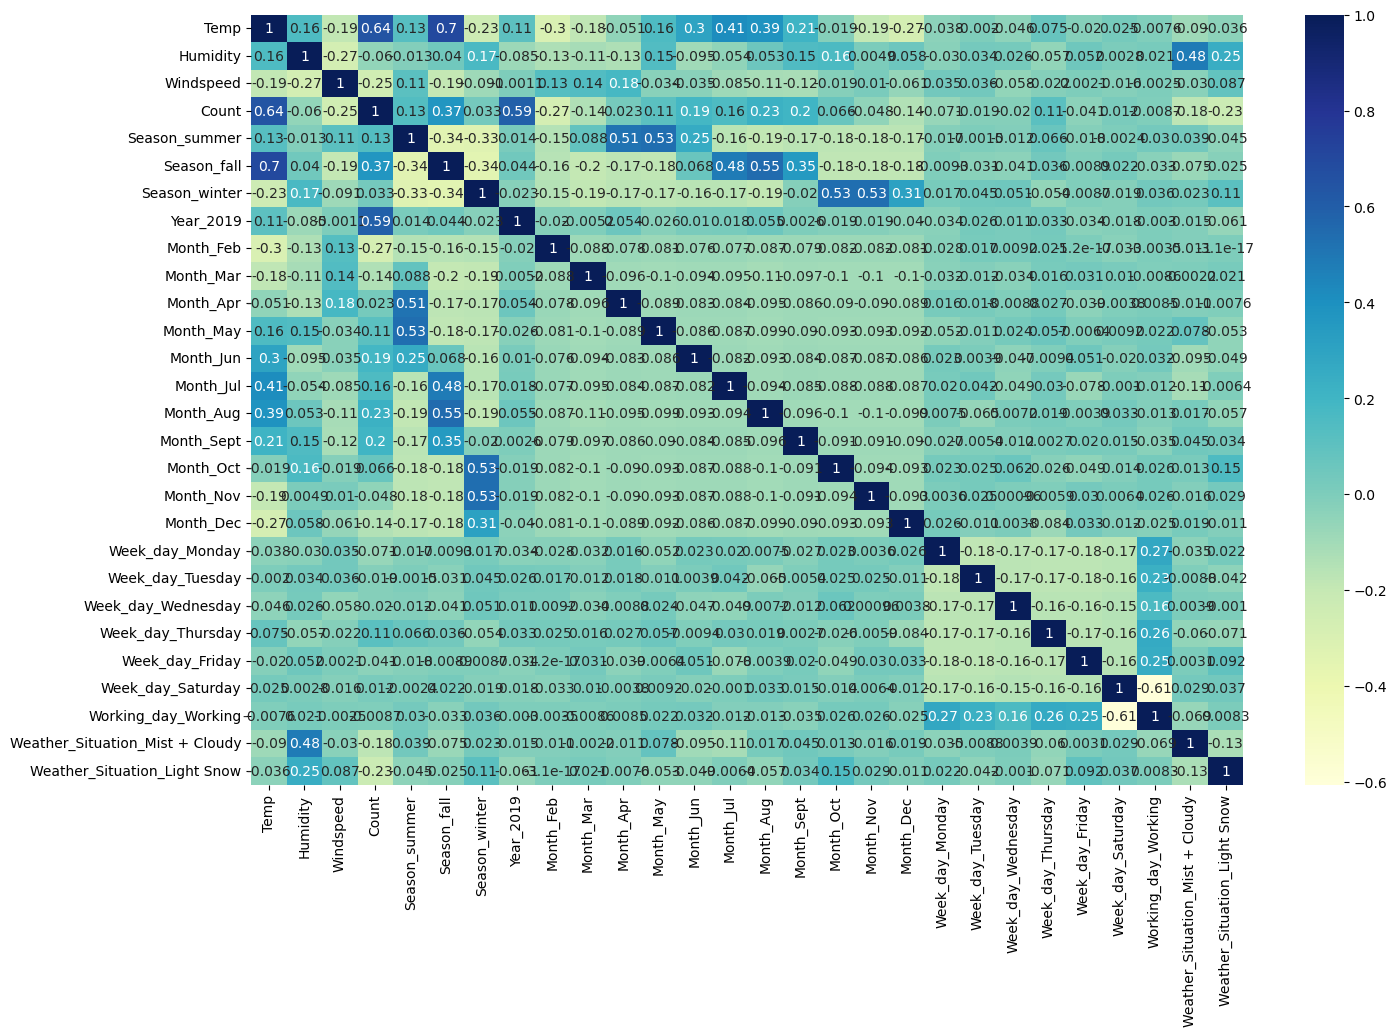

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Conclusion:-
As you might have noticed, `Temp` seems to the correlated to `Count` the most.Let plot plot the scatter plot of Temp vs Count.


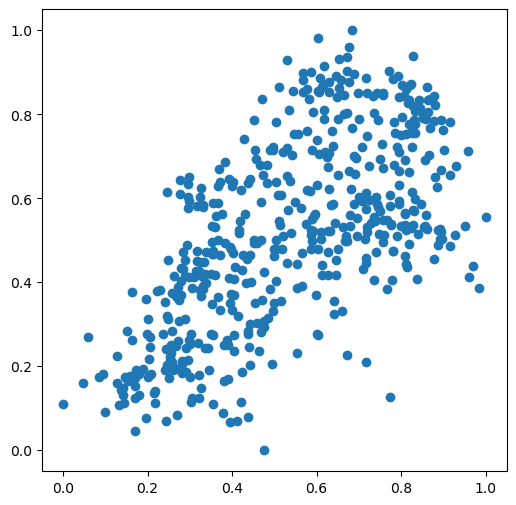

In [52]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.Temp, df_train.Count)
plt.show()

#### Observation:- 
So, we pick `Temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [53]:
#X_train and y_train
y_train = df_train.pop('Count')
X_train = df_train

### RFE - Recursive feature elimination

In [54]:
# create a linear regression object
model = LinearRegression()

# create the RFE model and select 10 Variables
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [55]:
# summarize the selection of the Variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_summer', True, 1),
 ('Season_fall', False, 9),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Feb', False, 14),
 ('Month_Mar', False, 10),
 ('Month_Apr', False, 12),
 ('Month_May', False, 11),
 ('Month_Jun', False, 13),
 ('Month_Jul', False, 15),
 ('Month_Aug', False, 7),
 ('Month_Sept', True, 1),
 ('Month_Oct', False, 8),
 ('Month_Nov', False, 17),
 ('Month_Dec', False, 16),
 ('Week_day_Monday', True, 1),
 ('Week_day_Tuesday', True, 1),
 ('Week_day_Wednesday', False, 2),
 ('Week_day_Thursday', False, 5),
 ('Week_day_Friday', False, 4),
 ('Week_day_Saturday', False, 18),
 ('Working_day_Working', False, 3),
 ('Weather_Situation_Mist + Cloudy', False, 6),
 ('Weather_Situation_Light Snow', True, 1)]

In [56]:
# The the Columns shows the RFE selected variables 
columns = X_train.columns[rfe.support_]
columns

Index(['Temp', 'Humidity', 'Windspeed', 'Season_summer', 'Season_winter',
       'Year_2019', 'Month_Sept', 'Week_day_Monday', 'Week_day_Tuesday',
       'Weather_Situation_Light Snow'],
      dtype='object')

In [57]:
# Display the not selected columns by the RFE
X_train.columns[~rfe.support_]

Index(['Season_fall', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May',
       'Month_Jun', 'Month_Jul', 'Month_Aug', 'Month_Oct', 'Month_Nov',
       'Month_Dec', 'Week_day_Wednesday', 'Week_day_Thursday',
       'Week_day_Friday', 'Week_day_Saturday', 'Working_day_Working',
       'Weather_Situation_Mist + Cloudy'],
      dtype='object')

## Step 5: Building a linear model using statsmodels

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [59]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.77e-184
Time:                        13:51:32   Log-Likelihood:                 487.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     499   BIC:                            -907.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##### Week_day_Monday is insignificant in presence of other variables; can be dropped

In [62]:
X_train_new = X_train_rfe.drop(["Week_day_Monday"], axis = 1)

#### Rebuilding the model without Week_day_Monday

In [63]:
# Adding a constant variable 
  
X_train_lm_1 = sm.add_constant(X_train_new)

In [64]:
# Running the linear model
lm_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [65]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.78e-184
Time:                        13:51:32   Log-Likelihood:                 486.18
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     500   BIC:                            -910.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [66]:
X_train_new.columns

Index(['const', 'Temp', 'Humidity', 'Windspeed', 'Season_summer',
       'Season_winter', 'Year_2019', 'Month_Sept', 'Week_day_Tuesday',
       'Weather_Situation_Light Snow'],
      dtype='object')

In [67]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,10.06
0,Temp,7.09
2,Windspeed,3.54
5,Year_2019,2.01
4,Season_winter,1.64
3,Season_summer,1.58
6,Month_Sept,1.20
7,Week_day_Tuesday,1.19
8,Weather_Situation_Light Snow,1.09


#### Observations:-
 - Based on the VIF values you provided, the “Humidity” feature has a VIF of 10.06, which indicates a high degree of multicollinearity with other predictor variables in the model. The “Temp” feature has a VIF of 7.09, which also indicates a high degree of multicollinearity. The “Windspeed” feature has a VIF of 3.54, which indicates moderate correlation. The remaining features have VIF values less than 2, indicating no or low correlation with other predictor variables in the model 1.
 - Hence we can consider dropping humidity column.


In [69]:
X_train_new = X_train_new.drop(['Humidity'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,3.65
1,Windspeed,2.98
4,Year_2019,2.00
2,Season_summer,1.55
3,Season_winter,1.35
5,Month_Sept,1.19
6,Week_day_Tuesday,1.18
7,Weather_Situation_Light Snow,1.06


### Observation:-
- The Model looks erfect with 8 variables and with the R-Squared = 82.7% and Adj.R-Squared = 84.4%.
- The VIF is less than 4.
- P values less than 0.05.
- F-Statistic value is almost equal to Zero.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and observe.

In [71]:
y_train_Count = lm_1.predict(X_train_lm_1)

Text(0.5, 0, 'Errors')

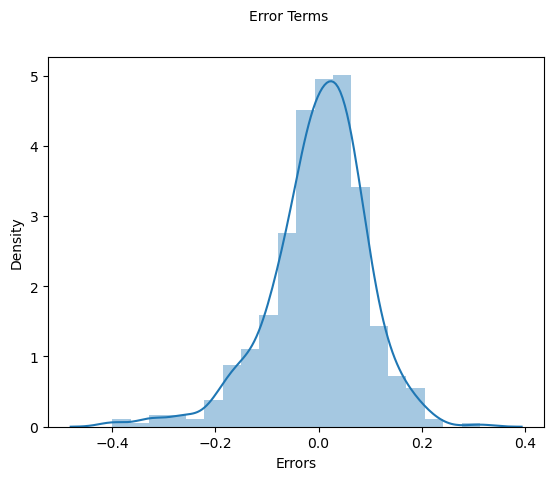

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Count), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 10)   
# X-label
plt.xlabel('Errors', fontsize = 10)                        

### Observations:- 
- As per the Assumptions of Linear Regression the Error Terms are normally distributed. 

## Making Predictions on the Test set

#### Applying the scaling on the test sets

In [73]:
# Apply scaler() to all the columns except'dummy' variables
# create list of numeric variables
num_vars = ['Temp', 'Humidity', 'Windspeed', 'Count']

# 2.For the data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [74]:
y_test = df_test.pop('Count')
X_test = df_test

In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [76]:
lm_2 = sm.OLS(y_test, X_test_new).fit()

In [77]:
lm_2.params

const                           0.021593
Temp                            0.598235
Windspeed                      -0.026178
Season_summer                   0.081768
Season_winter                   0.161070
Year_2019                       0.256648
Month_Sept                      0.067404
Week_day_Tuesday               -0.024358
Weather_Situation_Light Snow   -0.229775
dtype: float64

In [78]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     93.12
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           8.38e-65
Time:                        13:51:32   Log-Likelihood:                 169.33
No. Observations:                 219   AIC:                            -320.7
Df Residuals:                     210   BIC:                            -290.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0216      0.032      0.668      0.505      -0.042       0.085
Temp                             0.5982      0.034     17.704      0.000       0.532       0.665
Windspeed                       -0.0262      0.044     -0.596      0.552      -0.113       0.060
Season_summer                    0.0818      0.019      4.270      0.000       0.044       0.120
Season_winter                    0.1611      0.021      7.835      0.000       0.121       0.202
Year_2019                        0.2566      0.016     16.419      0.000       0.226       0.287
Month_Sept                       0.0674      0.029      2.345      0.020       0.011       0.124
Week_day_Tuesday                -0.0244      0.024     -1.020      0.309      -0.071       0.023
Weather_Situation_Light Snow    -0.2298      0.049     -4.692      0.000      -0.326      -0.133
==============================================================================
Omnibus:                       23.348   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.307
Skew:                          -0.762   Prob(JB):                     7.13e-07
Kurtosis:                       3.883   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Making predictions
y_pred = lm_2.predict(X_test_new)

In [80]:
y_pred

184    0.518549
535    0.899204
299    0.467913
221    0.542481
152    0.577091
         ...   
400    0.378292
702    0.730761
127    0.418768
640    0.882279
72     0.195790
Length: 219, dtype: float64

## Model Evaluation

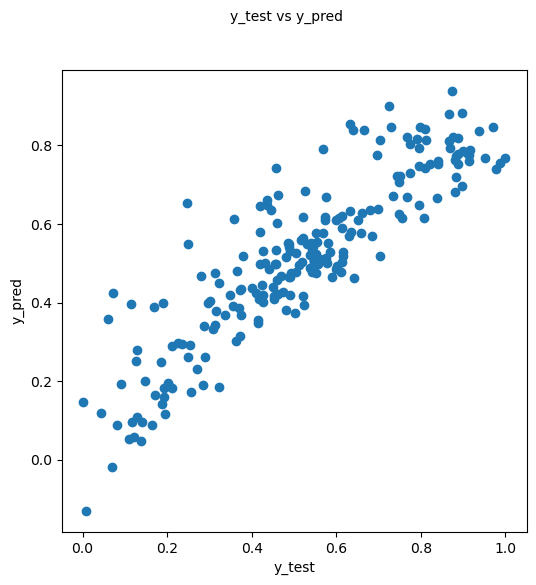

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=[6,6])
plt.scatter(y_test,y_pred)

# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=10)  

# X-label
plt.xlabel('y_test', fontsize=10)  

# Y-label
plt.ylabel('y_pred', fontsize=10)    
plt.show()

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7801015352126424

### Final Result:- 

      Train Data:-
        - Train R-Squared = 0.828, i.e. 82%
        - Train Adj.R-Squared = 0.824, i.e.82%
        
      Test Data:-
        - Test R-Squared = 0.780, i.e 78%
        - Test Adj.Squared = 0.772, i.e 77%
        
        R2_score = 0.78 or 78% 
        
  - The train R-squared value is 0.828, which means that 82.8% of the variance in the dependent variable is predictable from the independent variable(s) in the training dataset. The train adjusted R-squared value is 0.824, which is a modified version of the R-squared value that adjusts for the number of independent variables in the model.
  - The test R-squared value is 0.780, which means that 78.0% of the variance in the dependent variable is predictable from the independent variable(s) in the test dataset. The test adjusted R-squared value is 0.772, which is a modified version of the R-squared value that adjusts for the number of independent variables in the model.
   - This Shows that theModel has a high R-squared value for both the training and test datasets, indicating that it fits the data well and can make accurate predictions.However, it is important to consider other factors before drawing any conclusions about the model’s performance.
   - Hence we can Conclude that the R2_score is 0.78 or 78% which is a good fit model for predictions.